#HISTORICO DE MERCADO DE VALORES DE NINTENDO
#*@Autor:Fabian Camilo Salamanca R
#*@Date:2022/03/25
#*@Description:this project tries to take the price history of nintendo and apply WEb scraping

In [71]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)
import matplotlib.pyplot as plt #Para graficar
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D              
from bs4 import BeautifulSoup          # libreria para parsear documentos HTML

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [72]:
UrlWeb="https://finance.yahoo.com/quote/NTDOY/history?p=NTDOY"
ClassName="W(100%) M(0)"

In [73]:
!pip install kora -q
!apt install chronium-chromedriver
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package chronium-chromedriver


In [74]:
from kora.selenium import wd 
wd.get(UrlWeb) 
soup=BeautifulSoup(wd.page_source,'html.parser')

In [75]:
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))
df=pd.DataFrame(df_list_table[0])

In [76]:
#remove row 100 which is the description of each column
df=df[:-1]

In [77]:
#df.head(10)
df.tail(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume
90,"Nov 15, 2021",55.42,55.48,54.89,54.95,54.95,310900
91,"Nov 12, 2021",54.92,55.44,54.92,55.36,55.36,255000
92,"Nov 11, 2021",54.76,55.00,54.66,55.00,55.00,292700
93,"Nov 10, 2021",54.62,55.32,54.23,54.31,54.31,335300
94,"Nov 09, 2021",54.72,54.95,54.55,54.60,54.60,247300
95,"Nov 08, 2021",54.05,55.21,54.01,54.70,54.70,302700
96,"Nov 05, 2021",54.50,55.71,54.50,55.35,55.35,481600
97,"Nov 04, 2021",53.73,53.92,53.05,53.60,53.60,381900
98,"Nov 03, 2021",54.50,54.64,52.95,53.60,53.60,359900
99,"Nov 02, 2021",53.20,54.30,53.20,53.57,53.57,478100


In [78]:
print(df.info())
print("_____________describe________\n",df.describe())
print("_____________nulos?__________\n",df.isnull().sum())
print("_____________cols,rows__________\n",df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Open         100 non-null    object
 2   High         100 non-null    object
 3   Low          100 non-null    object
 4   Close*       100 non-null    object
 5   Adj Close**  100 non-null    object
 6   Volume       100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB
None
_____________describe________
                 Date   Open   High    Low Close* Adj Close**  Volume
count            100    100    100    100    100         100     100
unique           100     95     96     93     96          96     100
top     Mar 25, 2022  63.50  59.98  60.00  63.25       63.25  190509
freq               1      3      2      2      2           2       1
_____________nulos?__________
 Date           0
Open           0
High           0
Low            0
Close*  

In [79]:
df['Date']=df['Date'].str.replace('Jan ','01/')
df['Date']=df['Date'].str.replace('Feb ','02/')
df['Date']=df['Date'].str.replace('Mar ','03/')
df['Date']=df['Date'].str.replace('Apr ','04/')
df['Date']=df['Date'].str.replace('May ','05/')
df['Date']=df['Date'].str.replace('Jun ','06/')
df['Date']=df['Date'].str.replace('Jul ','07/')
df['Date']=df['Date'].str.replace('Aug ','08/')
df['Date']=df['Date'].str.replace('Sep ','09/')
df['Date']=df['Date'].str.replace('Oct ','10/')
df['Date']=df['Date'].str.replace('Nov ','11/')
df['Date']=df['Date'].str.replace('Dec ','12/')
df['Date']=df['Date'].str.replace(', ','/')

In [80]:
df.head(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,03/25/2022,67.14,68.00,66.89,66.95,66.95,190509
1,03/24/2022,66.21,66.36,66.06,66.22,66.22,175900
2,03/23/2022,65.00,65.95,65.00,65.72,65.72,290700
3,03/22/2022,64.10,64.62,64.10,64.60,64.60,129100
4,03/21/2022,63.50,64.59,63.50,64.28,64.28,266200
5,03/18/2022,64.06,64.58,63.78,64.56,64.56,313800
6,03/17/2022,64.81,64.81,63.40,64.29,64.29,160100
7,03/16/2022,63.40,64.50,63.12,63.78,63.78,307600
8,03/15/2022,61.20,61.39,60.81,61.20,61.20,377100
9,03/14/2022,61.39,62.10,61.20,61.27,61.27,218000


In [81]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=False)
df['Open']=pd.to_numeric(df['Open'])
df['High']=pd.to_numeric(df['High'])
df['Low']=pd.to_numeric(df['Low'])
df['Close*']=pd.to_numeric(df['Close*'])
df['Adj Close**']=pd.to_numeric(df['Adj Close**'])
df['Volume']=pd.to_numeric(df['Volume'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         100 non-null    datetime64[ns]
 1   Open         100 non-null    float64       
 2   High         100 non-null    float64       
 3   Low          100 non-null    float64       
 4   Close*       100 non-null    float64       
 5   Adj Close**  100 non-null    float64       
 6   Volume       100 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 5.6 KB
None


In [82]:
df.to_csv('Nintendo_2020-2021.csv',index_label='row')

# Delete Date

In [83]:
dates=df['Date']
df=df.drop('Date',1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         100 non-null    float64
 1   High         100 non-null    float64
 2   Low          100 non-null    float64
 3   Close*       100 non-null    float64
 4   Adj Close**  100 non-null    float64
 5   Volume       100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 4.8 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [84]:
df.describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,59.631800,60.167900,59.204700,59.685400,59.685400,366181.090000
std,3.243743,3.309505,3.286695,3.319125,3.319125,163662.299878
min,53.200000,53.920000,52.950000,53.570000,53.570000,99800.000000
25%,56.947500,57.667500,56.745000,57.120000,57.120000,251575.000000
50%,59.330000,59.990000,59.085000,59.360000,59.360000,324850.000000
75%,62.382500,63.110000,62.225000,62.545000,62.545000,466925.000000
max,67.140000,68.000000,66.890000,66.950000,66.950000,790200.000000


#normalize data in range 0 to 1

In [87]:
min_max_scaler= preprocessing.MinMaxScaler()
df_scaled=min_max_scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled)
df_scaled=df_scaled.rename(columns={0:'Open',1:'High',2:'Low',3:'Close*',4:'Adj Close**',5:'Volume'})
df_scaled.head()

,Open,High,Low,Close*,Adj Close**,Volume
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.131386
1,0.933286,0.883523,0.940459,0.945441,0.945441,0.110226
2,0.846485,0.854403,0.864419,0.908072,0.908072,0.276506
3,0.781923,0.759943,0.799857,0.824365,0.824365,0.042439
4,0.738881,0.757812,0.756815,0.800448,0.800448,0.241020


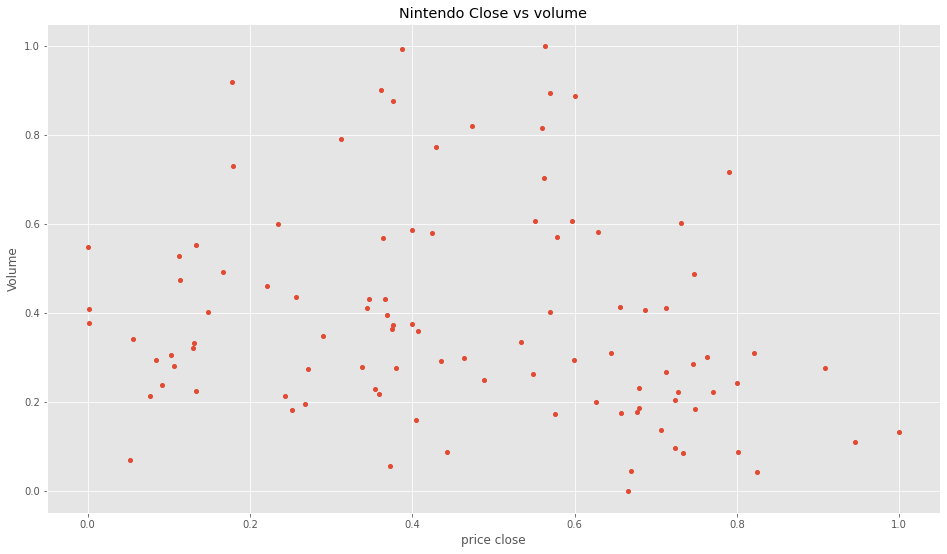

In [88]:
x=df_scaled['Close*'].values
y=df_scaled['Volume'].values
plt.xlabel('price close')
plt.ylabel('Volume')
plt.title('Nintendo Close vs volume')
plt.plot(x,y,'o',markersize=4)

#kmeans